In [3]:
# Author: Lifeng Ren
# Date: 9/28/2022
# Task: Reproduce Figure 1-Panel a, Figure 1-Panel b, Figure 2-Panel b for manuscript PNAS-sep22 using python

# Load libraries

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px


# Set the data/csv input path and read files
data_dir = os.path.join('C:\\', 'Users', 'Lifeng Ren', 'Projects', 'matlibplot_928', 'PNAS-Sep22', 'results','res')

#EVAR = pd.read_csv(data_dir,'EVAR.csv')            #get a permission denied error
EVAR = pd.read_csv(r'C:\Users\Lifeng Ren\Projects\matlibplot_928\PNAS-Sep22\results\res\EVAR.csv') 
GEAC = pd.read_csv(r'C:\Users\Lifeng Ren\Projects\matlibplot_928\PNAS-Sep22\results\res\GEAC.csv') 
EVAC = pd.read_csv(r'C:\Users\Lifeng Ren\Projects\matlibplot_928\PNAS-Sep22\results\res\EVAC.csv') 



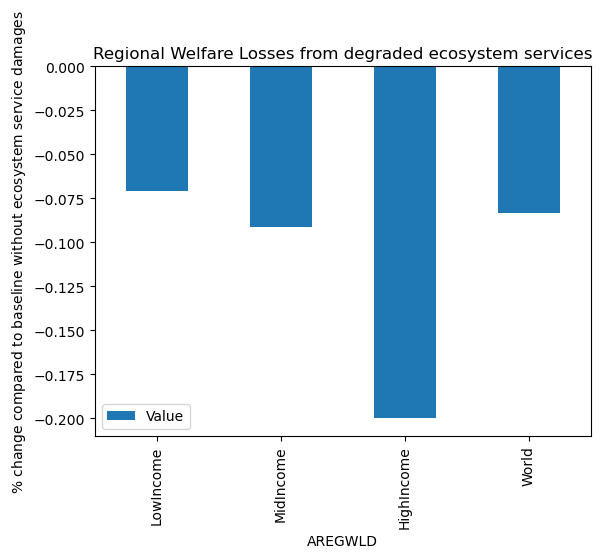

In [5]:
## Figure 1 - Panel a
EVAR_to_fig = EVAR.loc[(EVAR['EVCHANGE'] == 'EVpct') & (EVAR['SCEN'] == 'BAU_aES')]

'''One can uncomment the following lines to get a wide/pivot table. '''

#EVAR_to_fig=pd.pivot_table(EVAR_to_fig, values='Value', index=['SCEN'],
#                   columns=['AREGWLD'])

EVAR_to_fig.plot(x='AREGWLD', y='Value', kind="bar", legend=None)
plt.ylabel('$\%$ change compared to baseline without ecosystem service damages') 
plt.title(label='Regional Welfare Losses from degraded ecosystem services')
plt.savefig('Fig1a_EVAR.png')  

C:\Users\Lifeng Ren\AppData\Local\Temp\ipykernel_28132\175203348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEAC_plt.loc[len(GEAC_plt.index)] = ['World', 'GDP', 'BAU_aES', GEAC_plt['Value'].sum()]


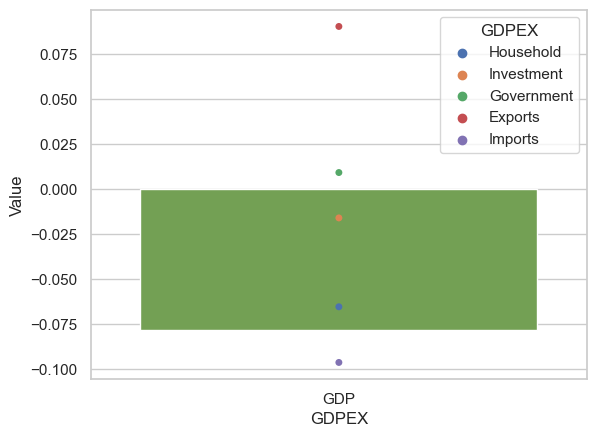

In [3]:
#Figure 1-Panel b-------GEAC.csv
GEAC_plt = GEAC.loc[(GEAC['SCEN'] == 'BAU_aES') & (GEAC['AREGWLD'] == 'World') & (GEAC['GDPEX'] != 'IntnlMargins')]
GEAC_plt.loc[len(GEAC_plt.index)] = ['World', 'GDP', 'BAU_aES', GEAC_plt['Value'].sum()] 

#Save to CSV file
GEAC_plt.to_csv('GEAC_plt.csv')

#Subset the dataframe into two parts: GEAC_plt_his for historgram; GEAC_plt_sca for scatter

GEAC_plt_his = GEAC_plt.loc[GEAC_plt['GDPEX'] == 'GDP']
GEAC_plt_sca = GEAC_plt.loc[GEAC_plt['GDPEX'] != 'GDP']

#Plot
sns.set(style="whitegrid")
sns.barplot(x="GDPEX", y="Value", data=GEAC_plt_his, capsize=.1, errorbar="sd", color = "#70AD47")
sns.swarmplot(y="Value", data=GEAC_plt_sca, hue="GDPEX")

plt.savefig('Fig1b_GEAC.png')

In [5]:
#Figure 2-Panel b

from turtle import color


EVAC_sub = EVAC.loc[(EVAC['SCEN'] == 'GlOBPES') | (EVAC['SCEN'] == 'NATPES') | (EVAC['SCEN'] == 'SRLand') | (EVAC['SCEN'] == 'SRnD20') | (EVAC['SCEN'] == 'GPESSRRnD20')]
EVAC_pivot = pd.pivot_table(EVAC_sub, values='Value', index=['AREGWLD', 'SCEN'],
                    columns=['EVDEC'], fill_value=0)

# Show/Output Pivot Table with Total Welfare

EVAC_pivot['Total Welfare'] = EVAC_pivot['Efficiency']+ EVAC_pivot['Market'] + EVAC_pivot['PES']

display(EVAC_pivot)
EVAC_pivot.to_csv('EVAC_plt.csv')
## Plot
fig = go.Figure()
#Total Welfare: Marker Part
EVAC_pivot = EVAC_pivot.reset_index()
EVAC_TW = pd.melt(EVAC_pivot, col_level=0, id_vars=['AREGWLD', 'SCEN'], value_vars=['Total Welfare', 'Efficiency','Market','PES'], value_name='Value')
EVAC_TW = EVAC_TW.loc[(EVAC_TW['EVDEC'] == 'Total Welfare')]
fig.add_trace(go.Scatter(x=[EVAC_TW.AREGWLD,EVAC_TW.SCEN], y=EVAC_TW.Value, mode='markers', name='Total Welfare', marker_color = 'green', marker_symbol = "diamond"))



#Bar Chart Part
colors = ["#4472C4", "#ED7D31", "#A5A5A5"]
EVAC_sub['EVDEC'] = EVAC_sub['EVDEC'].replace(['Efficiency'],'Efficiency Changes')
EVAC_sub['EVDEC'] = EVAC_sub['EVDEC'].replace(['Market'],'Market-mediated interregional transfers')
EVAC_sub['EVDEC'] = EVAC_sub['EVDEC'].replace(['PES'],'Fianacial Transfers for PES')

display(EVAC_sub)
for n, c in zip(EVAC_sub.EVDEC.unique(), colors):
    plot_EVAC_sub = EVAC_sub[EVAC_sub.EVDEC == n]
    fig.add_trace(
        go.Bar(x=[plot_EVAC_sub.AREGWLD,plot_EVAC_sub.SCEN], y=plot_EVAC_sub.Value, name=n, marker_color=c)
    )
fig.update_layout(barmode="relative", title="Regional welfare change with nature-smart policies")



fig.write_image("Fig2b_EVAC.png")


C:\Users\Lifeng Ren\AppData\Local\Temp\ipykernel_19740\2517705800.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lifeng Ren\AppData\Local\Temp\ipykernel_19740\2517705800.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lifeng Ren\AppData\Local\Temp\ipykernel_19740\2517705800.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda